Digit the ticker and look at the balance sheet and income statement reclassification


In [28]:
import requests
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
ticker=input("digita ticker ").upper()
url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker}&apikey=JC7HIING3L8QAD4X'
r = requests.get(url)
data = r.json()


In [29]:
db=pd.DataFrame(data["annualReports"])
db1=db[["fiscalDateEnding","totalAssets","totalLiabilities","reportedCurrency","totalCurrentAssets","totalNonCurrentAssets","totalCurrentLiabilities","totalNonCurrentLiabilities","shortTermDebt","longTermDebt","cashAndShortTermInvestments"]]

In [30]:

url2 = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={ticker}&apikey=JC7HIING3L8QAD4X'
r2 = requests.get(url2)
ist = r2.json()
d=ist["annualReports"]
df2=pd.DataFrame(d)
df2=df2[["fiscalDateEnding","totalRevenue","grossProfit","operatingIncome","incomeBeforeTax","netIncome","ebitda"]]
df2["fiscalDateEnding"]=pd.to_datetime(df2["fiscalDateEnding"]).dt.year
df2=df2.rename(columns={"grossProfit":"ROGC","ebitda":"mol","operatingIncome":"ROA","fiscalDateEnding":"date"})
for x in df2.columns:
    try:
        df2[x]=df2[x].astype(float)
    except:
        pass
df2

,date,totalRevenue,ROGC,ROA,incomeBeforeTax,netIncome,mol
0,2022.0,5.112760e+11,1.391920e+11,1.224800e+10,-5.939000e+09,-2.722000e+09,3.132000e+09
1,2021.0,4.679580e+11,1.269280e+11,2.487900e+10,3.815500e+10,3.336400e+10,5.037600e+10
2,2020.0,3.844520e+11,1.025600e+11,2.289900e+10,2.419400e+10,2.133100e+10,3.485000e+10
3,2019.0,2.789020e+11,6.762600e+10,1.454100e+10,1.398800e+10,1.158800e+10,2.624700e+10
4,2018.0,2.312640e+11,6.528300e+10,1.242100e+10,1.127000e+10,1.007300e+10,1.316200e+10


In [31]:

for x in db1.columns:
    try:
        db1[x]=db1[x].astype(float)
    except:
        pass
db1["fiscalDateEnding"]=pd.to_datetime(db1["fiscalDateEnding"])

db1["fiscalDateEnding"]=db1["fiscalDateEnding"].dt.year
db1=db1.rename(columns={"totalAssets":"invested_capital","reportedCurrency":"currency","totalLiabilities":"mezzi_di_terzi","fiscalDateEnding":"date","cashAndShortTermInvestments":"liquidità immediata"})
db1["mezzi_propri"]=db1["invested_capital"]-db1["mezzi_di_terzi"]
db1["debt"]=db1["shortTermDebt"]+db1["longTermDebt"]
db1=db1.drop(columns=["shortTermDebt","longTermDebt"])

db1=pd.merge(db1,df2, left_on="date", right_on="date",how="inner")
db1.insert(1,"ticker",ticker)
db1["ROI"]=db1["ROA"]/db1["invested_capital"]*100 
db1["ROE"]=db1["netIncome"]/db1["mezzi_propri"]
db1["CCN"]=db1["totalCurrentAssets"]-db1["totalCurrentLiabilities"]
db1

,date,ticker,invested_capital,mezzi_di_terzi,currency,totalCurrentAssets,totalNonCurrentAssets,totalCurrentLiabilities,totalNonCurrentLiabilities,liquidità immediata,...,debt,totalRevenue,ROGC,ROA,incomeBeforeTax,netIncome,mol,ROI,ROE,CCN
0,2022,AMZN,4.626750e+11,3.166320e+11,USD,1.467910e+11,1.352730e+11,1.553930e+11,1.641390e+11,7.002600e+10,...,7.174200e+10,5.112760e+11,1.391920e+11,1.224800e+10,-5.939000e+09,-2.722000e+09,3.132000e+09,2.647215,-0.018638,-8.602000e+09
1,2021,AMZN,4.205490e+11,2.823040e+11,USD,1.615800e+11,1.038100e+11,1.422660e+11,1.422380e+11,9.604900e+10,...,5.087100e+10,4.679580e+11,1.269280e+11,2.487900e+10,3.815500e+10,3.336400e+10,5.037600e+10,5.915839,0.241340,1.931400e+10
2,2020,AMZN,3.211950e+11,2.277910e+11,USD,1.327330e+11,1.484510e+11,1.263850e+11,1.033060e+11,8.439600e+10,...,3.323300e+10,3.844520e+11,1.025600e+11,2.289900e+10,2.419400e+10,2.133100e+10,3.485000e+10,7.129314,0.228374,6.348000e+09
3,2019,AMZN,2.252480e+11,1.631880e+11,USD,9.633400e+10,1.904050e+11,8.781200e+10,7.737600e+10,5.502100e+10,...,2.612700e+10,2.789020e+11,6.762600e+10,1.454100e+10,1.398800e+10,1.158800e+10,2.624700e+10,6.455551,0.186723,8.522000e+09
4,2018,AMZN,1.626480e+11,1.190990e+11,USD,7.510100e+10,9.166200e+10,6.839100e+10,6.175800e+10,4.125000e+10,...,2.633600e+10,2.312640e+11,6.528300e+10,1.242100e+10,1.127000e+10,1.007300e+10,1.316200e+10,7.636737,0.231303,6.710000e+09


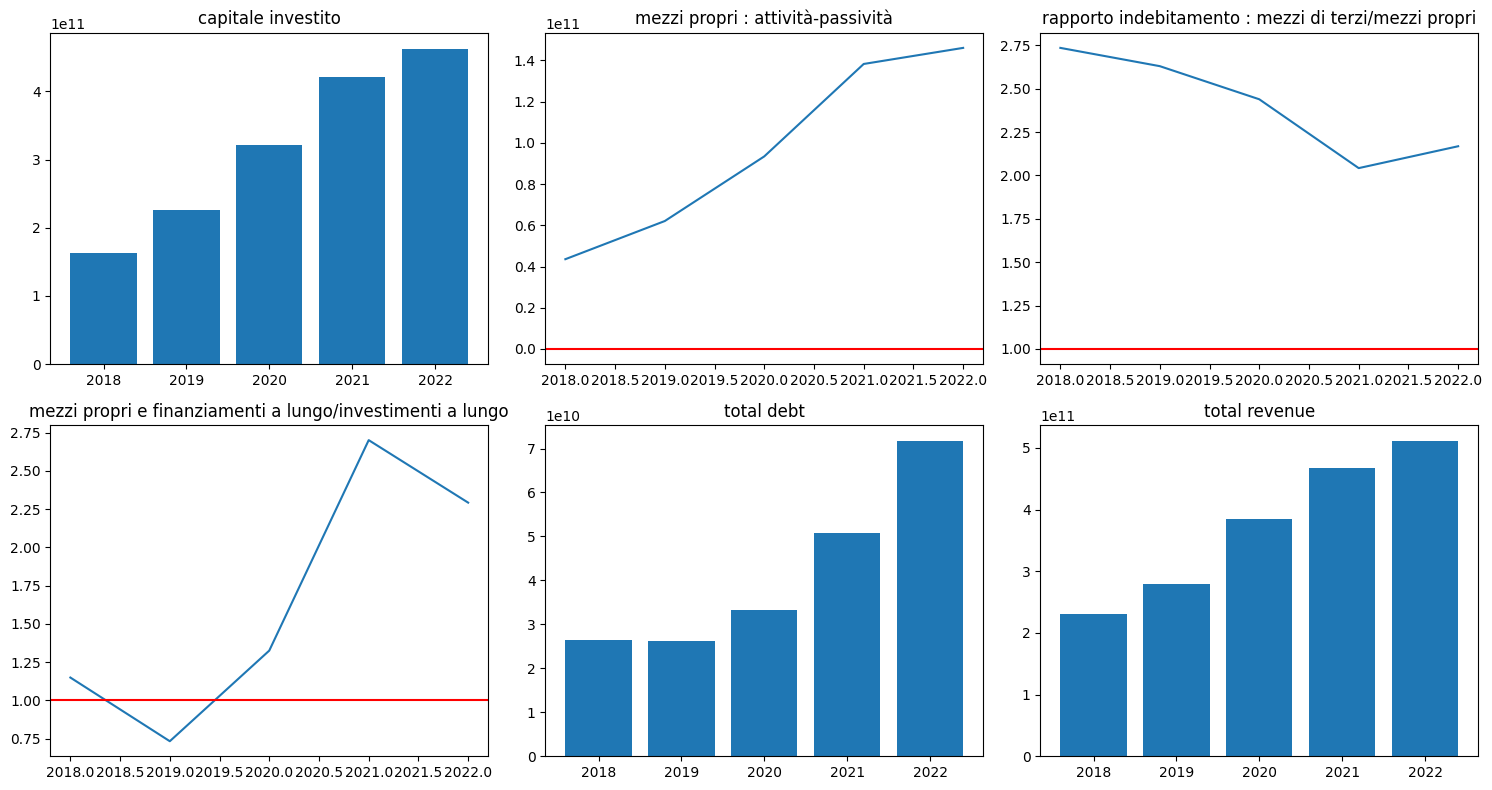

In [32]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))


axs[0, 0].bar(db1["date"], db1["invested_capital"])
axs[0, 0].set_title("capitale investito")


axs[0, 1].plot(db1["date"], db1["mezzi_propri"])
axs[0, 1].set_title("mezzi propri : attività-passività")
axs[0, 1].axhline(0, color="red")


axs[0, 2].plot(db1["date"], db1["mezzi_di_terzi"] / db1["mezzi_propri"])
axs[0, 2].set_title("rapporto indebitamento : mezzi di terzi/mezzi propri")
axs[0, 2].axhline(1, color="red")

axs[1, 0].plot(db1["date"], (db1["mezzi_propri"] + db1["totalNonCurrentLiabilities"]) / db1["totalNonCurrentAssets"])
axs[1, 0].set_title("mezzi propri e finanziamenti a lungo/investimenti a lungo")
axs[1, 0].axhline(1, color="red")

axs[1, 1].bar(db1["date"], db1["debt"])
axs[1, 1].set_title("total debt")

axs[1, 2].bar(db1["date"], db1["totalRevenue"])
axs[1, 2].set_title("total revenue")


plt.tight_layout()

plt.show()

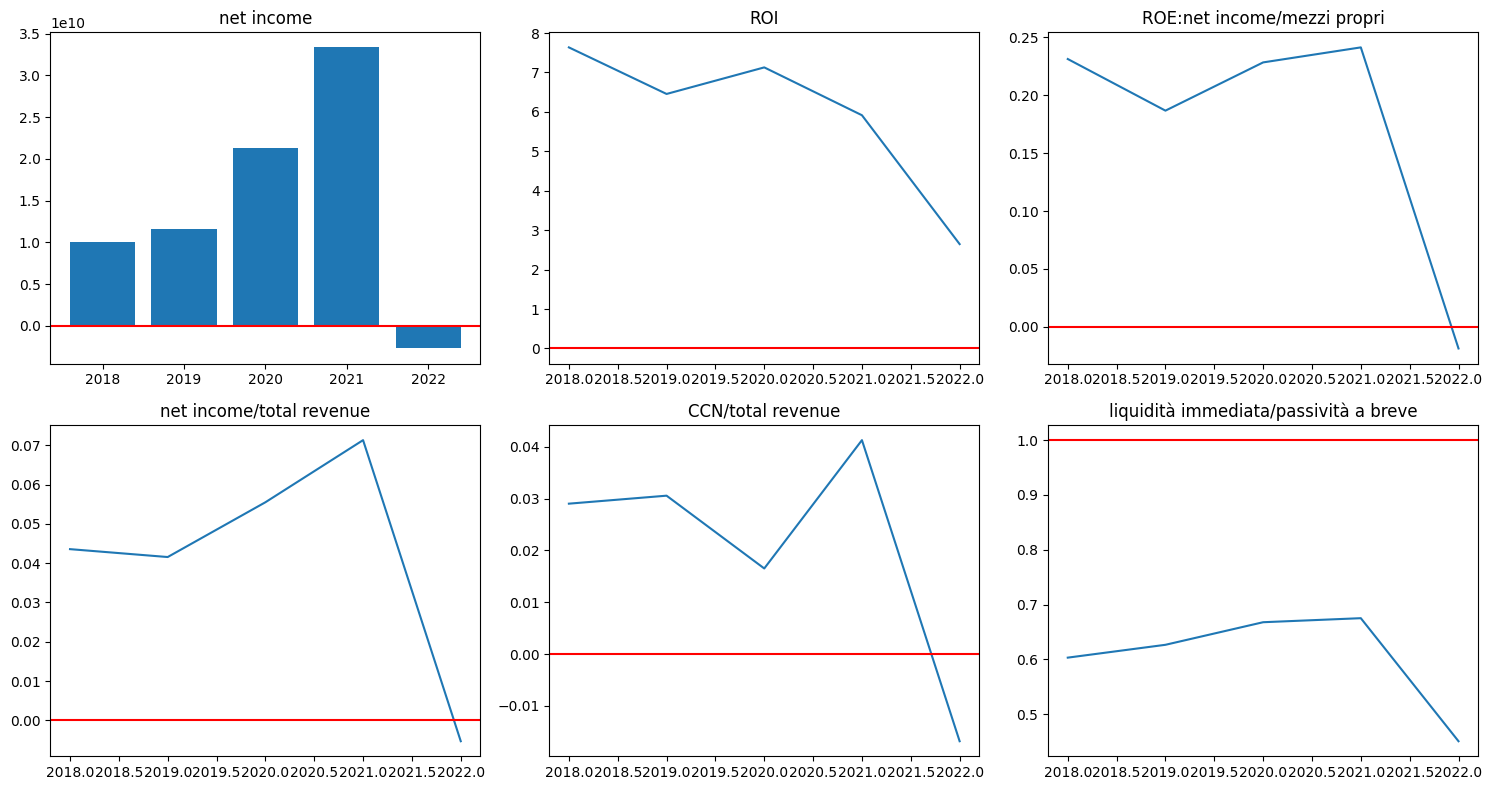

In [33]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))


axs[0, 0].bar(db1["date"], db1["netIncome"])
axs[0, 0].set_title("net income")
axs[0, 0].axhline(0, color="red")


axs[0, 1].plot(db1["date"], db1["ROI"])
axs[0, 1].set_title("ROI")
axs[0, 1].axhline(0, color="red")


axs[0, 2].plot(db1["date"], db1["ROE"])
axs[0, 2].set_title("ROE:net income/mezzi propri")
axs[0, 2].axhline(0, color="red")

axs[1, 0].plot(db1["date"], db1["netIncome"] / db1["totalRevenue"])
axs[1, 0].set_title("net income/total revenue")
axs[1, 0].axhline(0, color="red")

axs[1, 1].plot(db1["date"], db1["CCN"] / db1["totalRevenue"])
axs[1, 1].set_title("CCN/total revenue")
axs[1, 1].axhline(0, color="red")

axs[1, 2].plot(db1["date"], db1["liquidità immediata"] / db1["totalCurrentLiabilities"])
axs[1, 2].set_title("liquidità immediata/passività a breve")
axs[1, 2].axhline(1, color="red")


plt.tight_layout()
plt.show()